In [ ]:
import numpy as np
from matplotlib import pyplot as plt

### **(a) Parse and Plot Datapoints**

In [ ]:
with open('OldFaithfulGeyserData.txt') as f:
    data_array = [line.rstrip('\n') for line in f]
data_array

['    eruptions waiting',
 '1       3.600      79',
 '2       1.800      54',
 '3       3.333      74',
 '4       2.283      62',
 '5       4.533      85',
 '6       2.883      55',
 '7       4.700      88',
 '8       3.600      85',
 '9       1.950      51',
 '10      4.350      85',
 '11      1.833      54',
 '12      3.917      84',
 '13      4.200      78',
 '14      1.750      47',
 '15      4.700      83',
 '16      2.167      52',
 '17      1.750      62',
 '18      4.800      84',
 '19      1.600      52',
 '20      4.250      79',
 '21      1.800      51',
 '22      1.750      47',
 '23      3.450      78',
 '24      3.067      69',
 '25      4.533      74',
 '26      3.600      83',
 '27      1.967      55',
 '28      4.083      76',
 '29      3.850      78',
 '30      4.433      79',
 '31      4.300      73',
 '32      4.467      77',
 '33      3.367      66',
 '34      4.033      80',
 '35      3.833      74',
 '36      2.017      52',
 '37      1.867      48',
 '38      4.

In [ ]:
# remove all text explanations and read data points only
idx = data_array.index('    eruptions waiting')
data_array = data_array[idx+1:]

# parse string items to numeric items
data_lis = []
for str in data_array:
  entry_lis = list(map(float, str.split()[1:]))
  data_lis.append(entry_lis)

# convert python list to numpy array
data = np.array(data_lis)

data

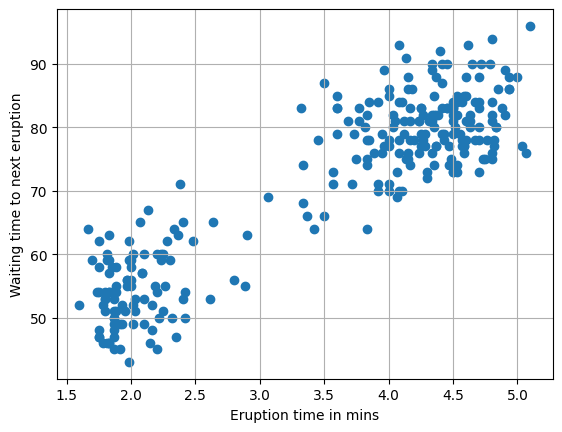

In [ ]:
# plot data points on 2d plane
plt.scatter(data[:, 0], data[:, 1], marker='o')
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.grid(True)
plt.show()

### **(b) Write down the Expression**

### **(c) Write down the formula**

### **(d) Implement and run the EM algorithm**

#### i. Implement the EM algorithm from scratch

In [ ]:
from matplotlib.axis import munits
import numpy as np
from scipy.stats import multivariate_normal

def initialize_parameters(data, num_clusters):
    num_data = data.shape[0]
    mu = data[np.random.choice(num_data, num_clusters)]
    sigma = num_clusters * [np.cov(data, rowvar=False)]
    phi = num_clusters * [1 / num_clusters]
    return mu, sigma, phi

def e_step(data, num_clusters, mu, sigma, phi):
    # initialize parameters
    num_data = data.shape[0]
    posterior = np.zeros((num_data, num_clusters))
    # compute parameters
    for k in range(num_clusters):
        posterior[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    return posterior / posterior.sum(axis=1, keepdims=True)

def m_step(data, num_clusters, posterior):
    # initialize parameters
    num_data = data.shape[0]
    num_features = data.shape[1]
    mu = np.zeros((num_clusters, num_features))
    sigma = np.zeros((num_clusters, num_features, num_features))
    phi = np.zeros(num_clusters)
    # compute parameters
    for k in range(num_clusters):
        phi_k = posterior[:, k].sum()
        mu[k] = (posterior[:, k].reshape(-1, 1) * data).sum(axis=0) / phi_k
        numerator = np.dot((posterior[:, k].reshape(-1, 1) * (data - mu[k])).T, (data - mu[k]))
        sigma[k] = numerator / phi_k
        phi[k] = phi_k / num_data
    return mu, sigma, phi

def objective(data, num_clusters, mu, sigma, phi):
    likelihood = np.zeros((data.shape[0], num_clusters))
    for k in range(num_clusters):
        likelihood[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])
    return np.sum(np.log(likelihood.sum(axis=1)))

def implement_EM(data, num_clusters=2, num_iterations=100, threshold=1e-6):
    mu, sigma, phi = initialize_parameters(data, num_clusters)
    log_likelihood_prev = 0
    for k in range(num_iterations):
        # e-step
        posterior = e_step(data, num_clusters, mu, sigma, phi)
        # m-step
        mu, sigma, phi = m_step(data, num_clusters, posterior)
        # compute log-likelihood
        log_likelihood_current = objective(data, num_clusters, mu, sigma, phi)
        # check for convergence
        if abs(log_likelihood_current - log_likelihood_prev) < threshold:
            print(f"Converged at iteration {k}")
            break
        # update log-likelihood
        log_likelihood_prev = log_likelihood_current
    return mu, sigma, phi

mu, sigma, phi = implement_EM(data, num_clusters=2)
print(f"mu: {mu}\n")
print(f"sigma: {sigma}\n")
print(f"phi: {phi}\n")

Converged at iteration 9
mu: [[ 4.28966404 79.96814021]
 [ 2.03639079 54.47853991]]

sigma: [[[ 0.16996581  0.94057589]
  [ 0.94057589 36.04583496]]

 [[ 0.06916953  0.43518701]
  [ 0.43518701 33.69741426]]]

phi: [0.64412618 0.35587382]



#### ii. State your termination criterion and explain the reasoning behind it.

#### iii. Scatter? plot the trajectories

In [ ]:
# Modify the implement_EM function to store the posterior probabilities
def implement_EM(data, num_clusters=2, num_iterations=100, threshold=1e-6):
    mu, sigma, phi = initialize_parameters(data, num_clusters)
    log_likelihood_prev = -np.inf
    mu_trajectory = {k: [] for k in range(num_clusters)}
    post_prob = []  # Store posterior probabilities

    for k in range(num_iterations):
        # Store the means
        for i in range(num_clusters):
            mu_trajectory[i].append(mu[i].copy())
        # e-step
        posterior = e_step(data, num_clusters, mu, sigma, phi)
        post_prob.append(posterior.copy())  # Store posterior
        # m-step
        mu, sigma, phi = m_step(data, num_clusters, posterior)
        # compute log-likelihood
        log_likelihood_current = objective(data, num_clusters, mu, sigma, phi)
        # check for convergence
        if abs(log_likelihood_current - log_likelihood_prev) < threshold:
            break
        log_likelihood_prev = log_likelihood_current

    return mu, sigma, phi, mu_trajectory, post_prob  # Return posterior

# Run the EM algorithm and get the trajectories and posteriors
mu, sigma, phi, mu_trajectory, post_prob = implement_EM(data, num_clusters=2)


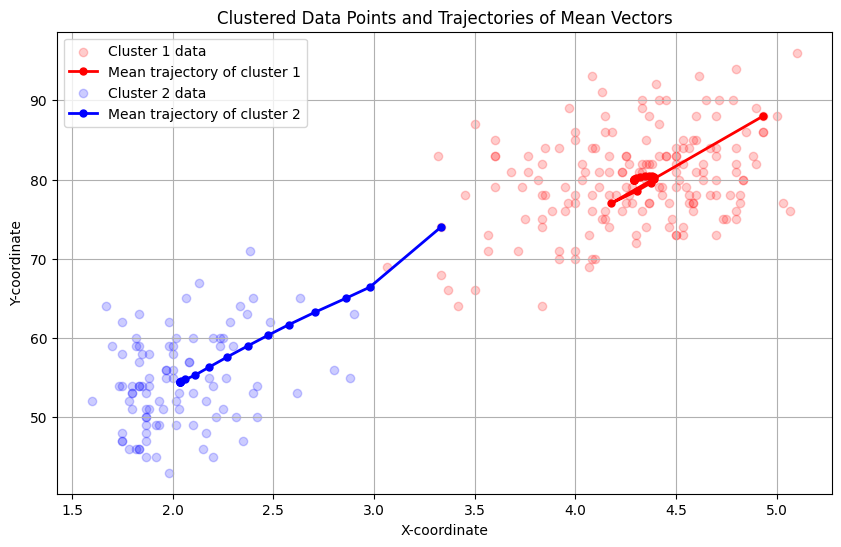

In [ ]:
# Assign colors to data points based on highest posterior probability
colors = ['red', 'blue', 'green', 'purple']  # Add more colors if you have more clusters

# Create a scatter plot for clustered data points
last_posterior = post_prob[-1]  # Using posteriors from the last iteration
cluster_assignments = np.argmax(last_posterior, axis=1)

plt.figure(figsize=(10, 6))
for i in range(2):  # Assuming two clusters
    cluster_data = data[cluster_assignments == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], alpha=0.2, label=f'Cluster {i+1} data')

    # Plotting the trajectories of the means
    mu_x, mu_y = zip(*mu_trajectory[i])
    plt.plot(mu_x, mu_y, color=colors[i], marker='o', linestyle='-', linewidth=2, markersize=5,
             label=f'Mean trajectory of cluster {i+1}')

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Clustered Data Points and Trajectories of Mean Vectors')
plt.legend()
plt.grid()
plt.show()

### **(e) Experiment with K -means clustering and Comment**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


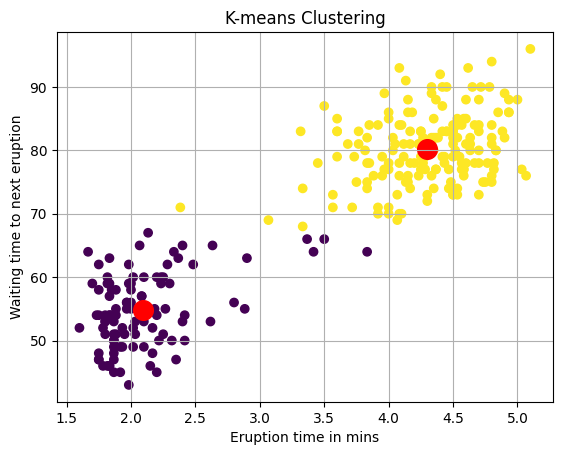

In [ ]:
from sklearn.cluster import KMeans

# k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(data)

# Plot
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o')
plt.title('K-means Clustering')
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.grid(True)
plt.show()